In [1043]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import KFold
import seaborn as sns
from sklearn.metrics import classification_report

In [1044]:
def evaluate_cv_model(model, data, target, kFolds):
    a_score = cross_val_score(model, data, target, cv=kFolds, scoring='accuracy')
    accuracy = a_score.mean()

    return accuracy

In [1045]:
def plot_confusionMatrix (clf, y_test, X_test):
    
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Blues")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    report = classification_report(y_test, y_pred)
    plt.show()

    return report

In [1046]:
# KNN classifier
def KNN(X_train, y_train, X_test, y_test, num_neighbors):
    
    # create the model
    KNN = KNeighborsClassifier(n_neighbors = num_neighbors)
    
    # fit the model
    KNN.fit(X_train, y_train)
    
    # get the accuracy
    test_accuracy = KNN.score(X_test, y_test)
    train_accuracy = KNN.score(X_train, y_train)
    
    # predict the values
    prediction = KNN.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction, KNN

In [1047]:
def SVM (X_train, y_train, X_test, y_test, kernel):

    # create the model for multiclass classification
    SVM = svm.SVC(kernel=kernel, C=1, decision_function_shape='ovo')
    
    # fit the model
    SVM.fit(X_train, y_train)
    
    # get the accuracy
    test_accuracy = SVM.score(X_test, y_test)
    train_accuracy = SVM.score(X_train, y_train)
    
    # predict the values
    prediction = SVM.predict(X_test)
    
    return test_accuracy, train_accuracy, prediction, SVM

In [1048]:
def Logistic_Regression (X_train, y_train, X_test, y_test):
    
    # create the model
    log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

    # fit the model
    log_reg.fit(X_train, y_train)

    # get the accuracy
    test_accuracy = log_reg.score(X_test, y_test)
    train_accuracy = log_reg.score(X_train, y_train)

    # predict the values
    prediction = log_reg.predict(X_test)

    return test_accuracy, train_accuracy, prediction, log_reg

## Read the data

In [1049]:
# EEG + ECG data
Both_data = pd.read_csv('Final_Data.csv')

EEG_data = pd.read_csv('preprocessed_EEG.csv')

ECG_data = pd.read_csv('preprocessed_ECG.csv')

In [1050]:
# #drop unnecessary columns
# Both_data.drop(['Unnamed: 0','video','video_name'], axis=1, inplace=True)
# EEG_data.drop(['Unnamed: 0','video','video_name'], axis=1, inplace=True)
# ECG_data.drop(['Unnamed: 0','video','video_name'], axis=1, inplace=True)

In [1051]:
#drop unnecessary columns
Both_data.drop(['Unnamed: 0','video_name'], axis=1, inplace=True)
EEG_data.drop(['Unnamed: 0','video_name'], axis=1, inplace=True)
ECG_data.drop(['Unnamed: 0','video_name'], axis=1, inplace=True)

In [1052]:
# #drop unnecessary columns
# Both_data.drop(['Unnamed: 0','video'], axis=1, inplace=True)
# EEG_data.drop(['Unnamed: 0','video'], axis=1, inplace=True)
# ECG_data.drop(['Unnamed: 0','video'], axis=1, inplace=True)

In [1053]:
# # drop unnecessary columns
# Both_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# EEG_data.drop(['Unnamed: 0'], axis=1, inplace=True)
# ECG_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [1054]:
y_Both = Both_data.target
X_Both = Both_data.drop('target' , axis = 1)

In [1055]:
y_EEG = EEG_data.target
X_EEG = EEG_data.drop('target' , axis = 1)

In [1056]:
y_ECG = ECG_data.target
X_ECG = ECG_data.drop('target' , axis = 1)

## Splitting the data

In [1057]:
kf = KFold(n_splits=8, random_state=42 , shuffle = True)

In [1058]:
X_train_Both, X_test_Both, y_train_Both, y_test_Both = train_test_split(X_Both, y_Both, test_size = 0.2, random_state = 42)
X_train_EEG, X_test_EEG, y_train_EEG, y_test_EEG = train_test_split(X_EEG, y_EEG, test_size = 0.2, random_state = 42)
X_train_ECG, X_test_ECG, y_train_ECG, y_test_ECG = train_test_split(X_ECG, y_ECG, test_size = 0.2, random_state = 42)

In [1059]:
y_test_Both = np.array(y_test_Both)
y_test_EEG = np.array(y_test_EEG)
y_test_ECG = np.array(y_test_ECG)

In [1060]:
# Function to evaluate the model
def Evaluate (y_test, prediction):
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction, average='weighted')
    recall = recall_score(y_test, prediction, average='weighted')
    f1 = f1_score(y_test, prediction, average='weighted')
    return accuracy, precision, recall, f1

# KNN model

## EEG Data

### Choosing the best k value

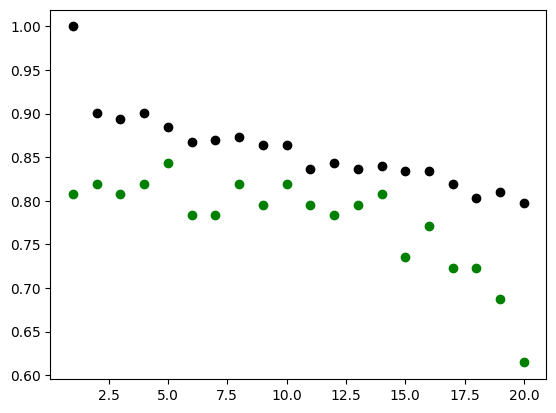

In [1061]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_EEG, y_train_EEG)
  
    training_score = knn.score(X_train_EEG, y_train_EEG)
    test_score = knn.score(X_test_EEG, y_test_EEG)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Evaluation without Cross Validation

In [1062]:
KNN_test, KNN_train, KNN_prediction, KNN_model = KNN(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 5)
#print(KNN_test*100, KNN_train*100)
print(f"Triaing Accuracy: {KNN_train*100}\nTesting Accuracy: {KNN_test*100}")

Triaing Accuracy: 88.51963746223565
Testing Accuracy: 84.33734939759037


### Evaulation with Cross Validation

In [1063]:
cv_accuracy = evaluate_cv_model(KNN_model, X_EEG, y_EEG, kf)
print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 81.90045248868778


### Confusion Matrix

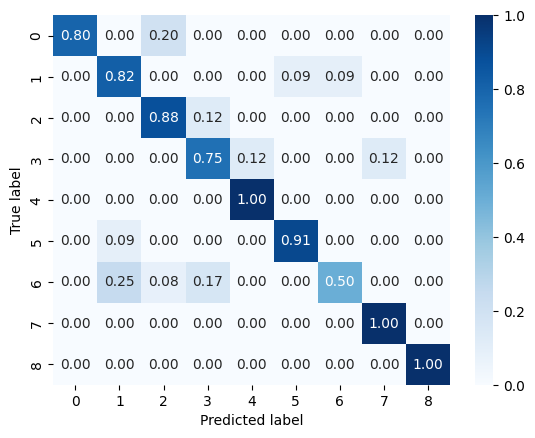

In [1064]:
report = plot_confusionMatrix(KNN_model, y_test_EEG, X_test_EEG)

### Classification Report

In [1065]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.69      0.82      0.75        11
           2       0.78      0.88      0.82         8
           3       0.67      0.75      0.71         8
           4       0.90      1.00      0.95         9
           5       0.91      0.91      0.91        11
           6       0.86      0.50      0.63        12
           7       0.92      1.00      0.96        11
           8       1.00      1.00      1.00         8

    accuracy                           0.84        83
   macro avg       0.86      0.85      0.85        83
weighted avg       0.85      0.84      0.84        83



## ECG Data

### Choosing the best k value

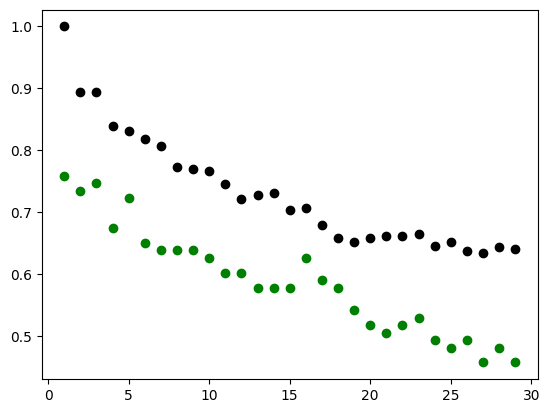

In [1066]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_ECG, y_train_ECG)
  
    training_score = knn.score(X_train_ECG, y_train_ECG)
    test_score = knn.score(X_test_ECG, y_test_ECG)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Evaluation without Cross Validation

In [1067]:
KNN_test, KNN_train, KNN_prediction, KNN_model = KNN(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 3)
print(f"Triaing Accuracy: {KNN_train*100}\nTesting Accuracy: {KNN_test*100}")

Triaing Accuracy: 89.42598187311178
Testing Accuracy: 74.69879518072288


### Evaluation with Cross Validation

In [1068]:
cv_accuracy = evaluate_cv_model(KNN_model, X_ECG, y_ECG, kf)
print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 77.0550527903469


### Confusion Matrix

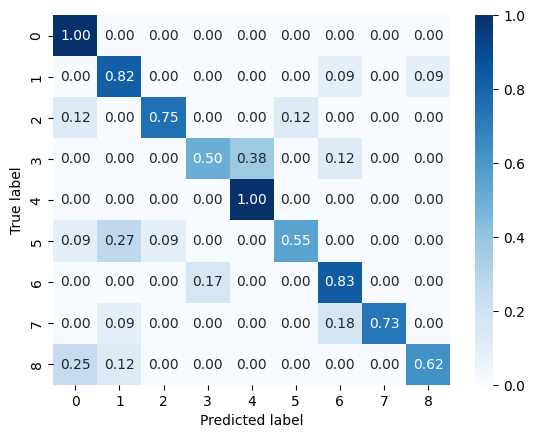

In [1069]:
report = plot_confusionMatrix(KNN_model, y_test_ECG, X_test_ECG)

### Classification Report

In [1070]:
print(report)

              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.64      0.82      0.72        11
           2       0.86      0.75      0.80         8
           3       0.67      0.50      0.57         8
           4       0.75      1.00      0.86         9
           5       0.86      0.55      0.67        11
           6       0.71      0.83      0.77        12
           7       1.00      0.73      0.84        11
           8       0.83      0.62      0.71         8

    accuracy                           0.75        83
   macro avg       0.76      0.76      0.74        83
weighted avg       0.78      0.75      0.74        83



## ECG + EEG Data

### Choosing the best k value

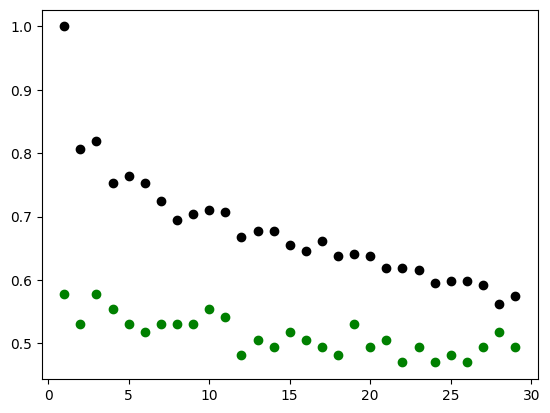

In [1071]:
K = []
training = []
test = []
scores = {}
  
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_Both, y_train_Both)
  
    training_score = knn.score(X_train_Both, y_train_Both)
    test_score = knn.score(X_test_Both, y_test_Both)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

### Evaluation without Cross Validation

In [1072]:
KNN_test, KNN_train, KNN_prediction, KNN_model = KNN(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 3)
print(f"Triaing Accuracy: {KNN_train*100}\nTesting Accuracy: {KNN_test*100}")

Triaing Accuracy: 81.87311178247734
Testing Accuracy: 57.831325301204814


### Evaluation with Cross Validation

In [1073]:
cv_accuracy = evaluate_cv_model(KNN_model, X_Both, y_Both, kf)
print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 62.127639517345386


### Confusion Matrix

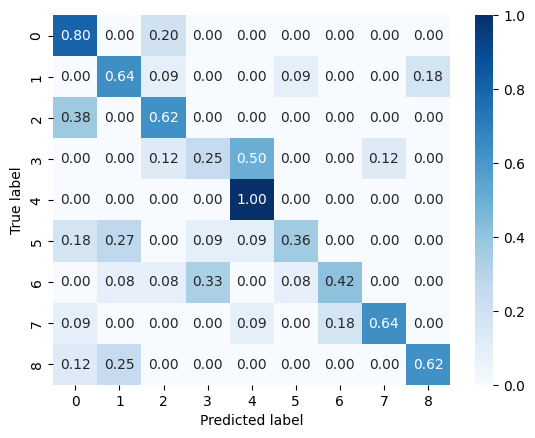

In [1074]:
report = plot_confusionMatrix(KNN_model, y_test_Both, X_test_Both)

### Classification Report

In [1075]:
print(report)

              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.54      0.64      0.58        11
           2       0.56      0.62      0.59         8
           3       0.29      0.25      0.27         8
           4       0.60      1.00      0.75         9
           5       0.67      0.36      0.47        11
           6       0.71      0.42      0.53        12
           7       0.88      0.64      0.74        11
           8       0.71      0.62      0.67         8

    accuracy                           0.58        83
   macro avg       0.59      0.59      0.57        83
weighted avg       0.62      0.58      0.57        83



# SVM models

## EEG Data

### Linear Kernel

### Evaluation without Cross Validation

In [1076]:
SVM_linear_test, SVM_linear_train, SVM_linear_prediction, SVM_model_linear = SVM(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 'linear')

print(f"Triaing Accuracy: {SVM_linear_train*100}\nTesting Accuracy: {SVM_linear_test*100}")

Triaing Accuracy: 29.909365558912388
Testing Accuracy: 16.867469879518072


### Evaluation with Cross Validation

In [1077]:
cv_accuracy = evaluate_cv_model(SVM_model_linear, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 16.680806938159883


### Confusion Matrix

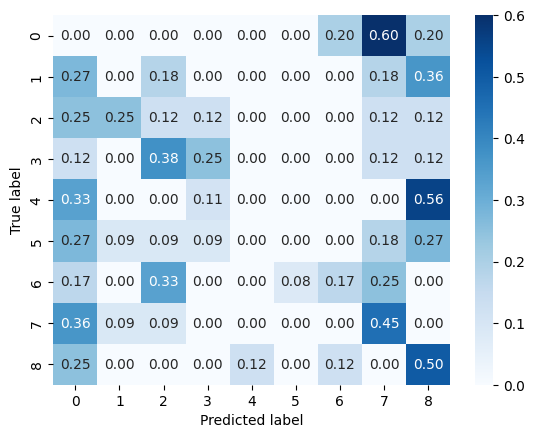

In [1078]:
report = plot_confusionMatrix(SVM_model_linear, y_test_EEG, X_test_EEG)

### Classification Report

In [1079]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.08      0.12      0.10         8
           3       0.40      0.25      0.31         8
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        11
           6       0.50      0.17      0.25        12
           7       0.29      0.45      0.36        11
           8       0.21      0.50      0.30         8

    accuracy                           0.17        83
   macro avg       0.17      0.17      0.15        83
weighted avg       0.18      0.17      0.15        83



### RBF Kernel

### Evaluation without Cross Validation

In [1080]:
SVM_RBF_test, SVM_RBF_train, SVM_RBF_prediction, SVM_model_RBF = SVM(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 'rbf')

print(f"Triaing Accuracy: {SVM_RBF_train*100}\nTesting Accuracy: {SVM_RBF_test*100}")

Triaing Accuracy: 29.607250755287005
Testing Accuracy: 22.89156626506024


### Evaluation with Cross Validation

In [1081]:
cv_accuracy = evaluate_cv_model(SVM_model_RBF, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 22.223793363499247


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


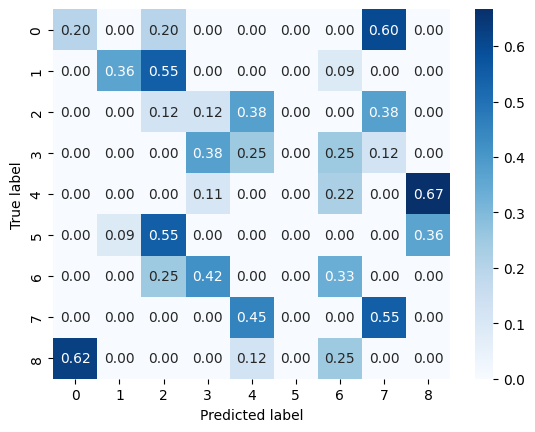

In [1082]:
report = plot_confusionMatrix(SVM_model_RBF, y_test_EEG, X_test_EEG)

### Classification Report

In [1083]:
print(report)

              precision    recall  f1-score   support

           0       0.17      0.20      0.18         5
           1       0.80      0.36      0.50        11
           2       0.06      0.12      0.08         8
           3       0.30      0.38      0.33         8
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        11
           6       0.36      0.33      0.35        12
           7       0.46      0.55      0.50        11
           8       0.00      0.00      0.00         8

    accuracy                           0.23        83
   macro avg       0.24      0.22      0.22        83
weighted avg       0.26      0.23      0.23        83



### Sigmoid Kernel

### Evaluation without Cross Validation

In [1084]:
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction, SVM_model_sigmoid = SVM(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 'sigmoid')

print(f"Triaing Accuracy: {SVM_sigmoid_train*100}\nTesting Accuracy: {SVM_sigmoid_test*100}")

Triaing Accuracy: 16.61631419939577
Testing Accuracy: 12.048192771084338


### Evaluation with Cross Validation

In [1085]:
cv_accuracy = evaluate_cv_model(SVM_model_sigmoid, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 12.811085972850677


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


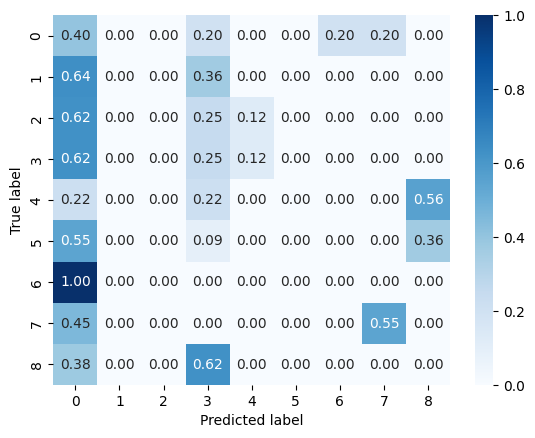

In [1086]:
report = plot_confusionMatrix(SVM_model_sigmoid, y_test_EEG, X_test_EEG)

### Classification Report

In [1087]:
print(report)

              precision    recall  f1-score   support

           0       0.04      0.40      0.08         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.12      0.25      0.16         8
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        12
           7       0.86      0.55      0.67        11
           8       0.00      0.00      0.00         8

    accuracy                           0.12        83
   macro avg       0.11      0.13      0.10        83
weighted avg       0.13      0.12      0.11        83



### Polynomial Kernel

### Evaluation without Cross Validation

In [1088]:
SVM_poly_test, SVM_poly_train, SVM_poly_prediction, SVM_model_Poly = SVM(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG, 'poly')

print(f"Triaing Accuracy: {SVM_poly_train*100}\nTesting Accuracy: {SVM_poly_test*100}")

Triaing Accuracy: 21.148036253776432
Testing Accuracy: 13.253012048192772


### Evaluation with Cross Validation

In [1089]:
cv_accuracy = evaluate_cv_model(SVM_model_Poly, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 11.854260935143287


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


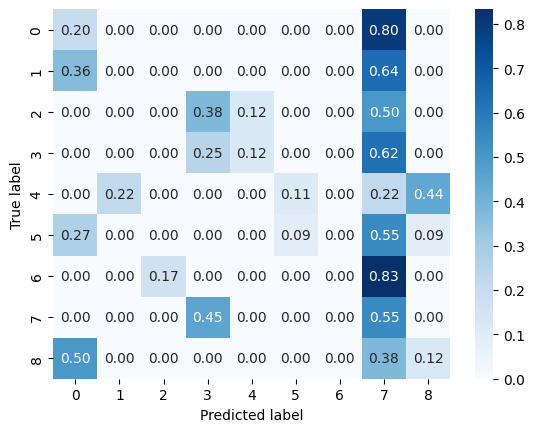

In [1090]:
report = plot_confusionMatrix(SVM_model_Poly, y_test_EEG, X_test_EEG)

### Classification Report

In [1091]:
print(report)

              precision    recall  f1-score   support

           0       0.08      0.20      0.12         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.20      0.25      0.22         8
           4       0.00      0.00      0.00         9
           5       0.50      0.09      0.15        11
           6       0.00      0.00      0.00        12
           7       0.13      0.55      0.21        11
           8       0.17      0.12      0.14         8

    accuracy                           0.13        83
   macro avg       0.12      0.13      0.09        83
weighted avg       0.12      0.13      0.09        83



## ECG Data

### Linear Kernel

### Evaluation without Cross Validation

In [1092]:
SVM_linear_test, SVM_linear_train, SVM_linear_prediction, SVM_model_linear = SVM(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 'linear')

print(f"Triaing Accuracy: {SVM_linear_train*100}\nTesting Accuracy: {SVM_linear_test*100}")

Triaing Accuracy: 51.66163141993958
Testing Accuracy: 33.734939759036145


### Evaluation with Cross Validation

In [1093]:
cv_accuracy = evaluate_cv_model(SVM_model_linear, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 38.178733031674206


### Confusion Matrix

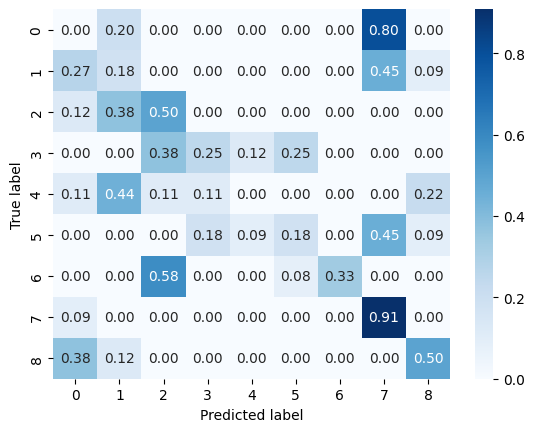

In [1094]:
report = plot_confusionMatrix(SVM_model_linear, y_test_ECG, X_test_ECG)

### Classification Report

In [1095]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.18      0.18      0.18        11
           2       0.27      0.50      0.35         8
           3       0.40      0.25      0.31         8
           4       0.00      0.00      0.00         9
           5       0.40      0.18      0.25        11
           6       1.00      0.33      0.50        12
           7       0.42      0.91      0.57        11
           8       0.50      0.50      0.50         8

    accuracy                           0.34        83
   macro avg       0.35      0.32      0.30        83
weighted avg       0.39      0.34      0.32        83



### RBF Kernel

### Evaluation without Cross Validation

In [1096]:
SVM_RBF_test, SVM_RBF_train, SVM_RBF_prediction, SVM_model_RBF = SVM(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 'rbf')

print(f"Triaing Accuracy: {SVM_RBF_train*100}\nTesting Accuracy: {SVM_RBF_test*100}")

Triaing Accuracy: 30.815709969788518
Testing Accuracy: 16.867469879518072


### Evaluation with Cross Validation

In [1097]:
cv_accuracy = evaluate_cv_model(SVM_model_RBF, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 22.025829562594268


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


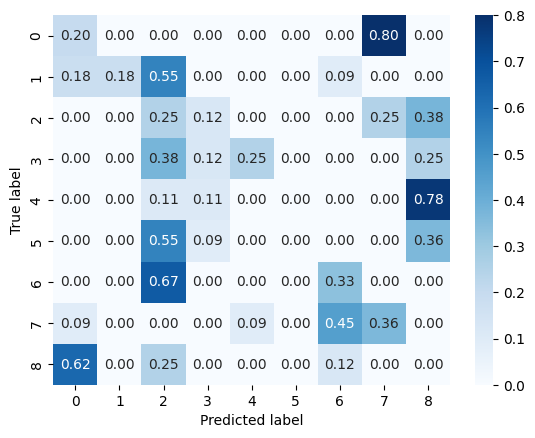

In [1098]:
report = plot_confusionMatrix(SVM_model_RBF, y_test_ECG, X_test_ECG)

### Classification Report

In [1099]:
print(report)

              precision    recall  f1-score   support

           0       0.11      0.20      0.14         5
           1       1.00      0.18      0.31        11
           2       0.07      0.25      0.11         8
           3       0.25      0.12      0.17         8
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        11
           6       0.36      0.33      0.35        12
           7       0.40      0.36      0.38        11
           8       0.00      0.00      0.00         8

    accuracy                           0.17        83
   macro avg       0.24      0.16      0.16        83
weighted avg       0.28      0.17      0.18        83



### Sigmoid Kernel

### Evaluation without Cross Validation

In [1100]:
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction, SVM_model_sigmoid = SVM(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 'sigmoid')

print(f"Triaing Accuracy: {SVM_sigmoid_train*100}\nTesting Accuracy: {SVM_sigmoid_test*100}")

Triaing Accuracy: 12.386706948640484
Testing Accuracy: 13.253012048192772


### Evaluation with Cross Validation

In [1101]:
cv_accuracy = evaluate_cv_model(SVM_model_sigmoid, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 10.902149321266968


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


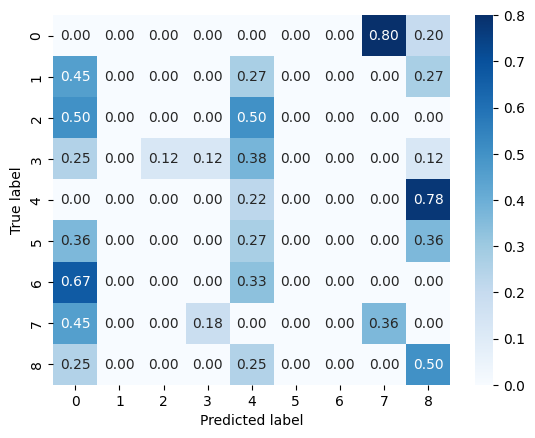

In [1102]:
report = plot_confusionMatrix(SVM_model_sigmoid, y_test_ECG, X_test_ECG)

### Classification Report

In [1103]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.33      0.12      0.18         8
           4       0.10      0.22      0.13         9
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        12
           7       0.50      0.36      0.42        11
           8       0.20      0.50      0.29         8

    accuracy                           0.13        83
   macro avg       0.13      0.13      0.11        83
weighted avg       0.13      0.13      0.12        83



### Polynomial Kernel

### Evaluation without Cross Validation

In [1104]:
SVM_poly_test, SVM_poly_train, SVM_poly_prediction, SVM_model_Poly = SVM(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG, 'poly')

print(f"Triaing Accuracy: {SVM_poly_train*100}\nTesting Accuracy: {SVM_poly_test*100}")

Triaing Accuracy: 31.419939577039273
Testing Accuracy: 19.27710843373494


### Evaluation with Cross Validation

In [1105]:
cv_accuracy = evaluate_cv_model(SVM_model_Poly, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 23.449283559577676


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


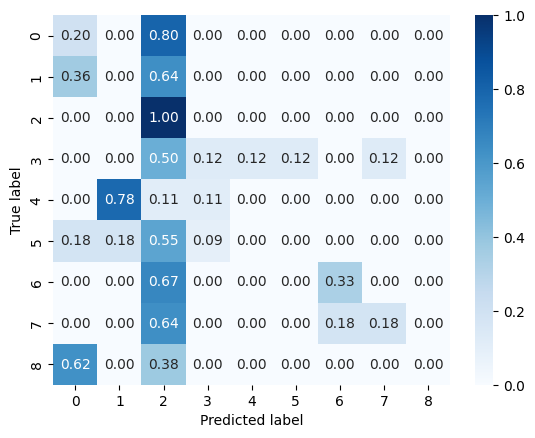

In [1106]:
report = plot_confusionMatrix(SVM_model_Poly, y_test_ECG, X_test_ECG)

### Classification Report

In [1107]:
print(report)

              precision    recall  f1-score   support

           0       0.08      0.20      0.12         5
           1       0.00      0.00      0.00        11
           2       0.17      1.00      0.29         8
           3       0.33      0.12      0.18         8
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        11
           6       0.67      0.33      0.44        12
           7       0.67      0.18      0.29        11
           8       0.00      0.00      0.00         8

    accuracy                           0.19        83
   macro avg       0.21      0.20      0.15        83
weighted avg       0.24      0.19      0.15        83



## ECG + EEG Data

### Linear Kernel

### Evaluation without Cross Validation

In [1108]:
SVM_linear_test, SVM_linear_train, SVM_linear_prediction, SVM_model_linear = SVM(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 'linear')

print(f"Triaing Accuracy: {SVM_linear_train*100}\nTesting Accuracy: {SVM_linear_test*100}")

Triaing Accuracy: 65.86102719033232
Testing Accuracy: 38.55421686746988


### Evaluation with Cross Validation

In [1109]:
cv_accuracy = evaluate_cv_model(SVM_model_linear, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 33.59728506787331


### Confusion Matrix

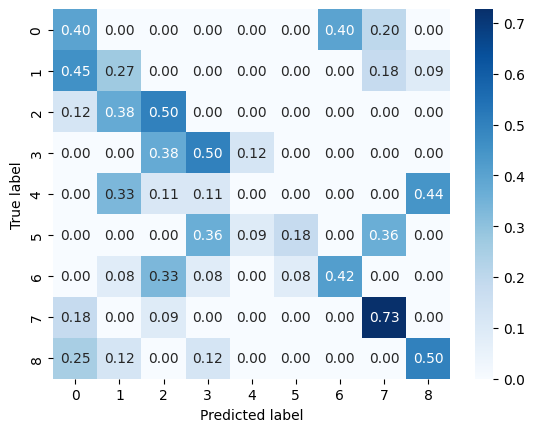

In [1110]:
report = plot_confusionMatrix(SVM_model_linear, y_test_Both, X_test_Both)

### Classification Report

In [1111]:
print(report)

              precision    recall  f1-score   support

           0       0.17      0.40      0.24         5
           1       0.27      0.27      0.27        11
           2       0.31      0.50      0.38         8
           3       0.36      0.50      0.42         8
           4       0.00      0.00      0.00         9
           5       0.67      0.18      0.29        11
           6       0.71      0.42      0.53        12
           7       0.53      0.73      0.62        11
           8       0.44      0.50      0.47         8

    accuracy                           0.39        83
   macro avg       0.39      0.39      0.36        83
weighted avg       0.42      0.39      0.37        83



### RBF Kernel

### Evaluation without Cross Validation

In [1112]:
SVM_RBF_test, SVM_RBF_train, SVM_RBF_prediction, SVM_model_RBF = SVM(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 'rbf')

print(f"Triaing Accuracy: {SVM_RBF_train*100}\nTesting Accuracy: {SVM_RBF_test*100}")

Triaing Accuracy: 35.95166163141994
Testing Accuracy: 20.481927710843372


### Evaluation with Cross Validation

In [1113]:
cv_accuracy = evaluate_cv_model(SVM_model_RBF, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 22.487745098039216


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


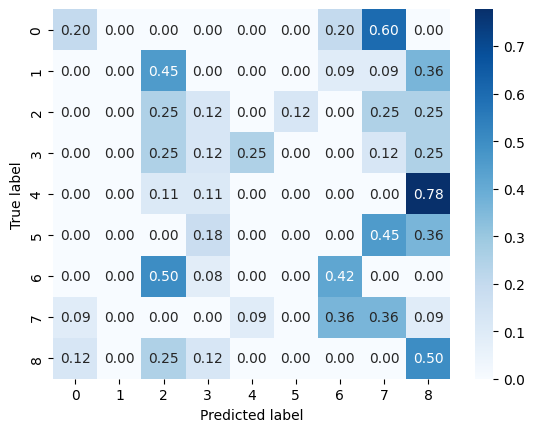

In [1114]:
report = plot_confusionMatrix(SVM_model_RBF, y_test_Both, X_test_Both)

### Classification Report

In [1115]:
print(report)

              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.00      0.00      0.00        11
           2       0.11      0.25      0.15         8
           3       0.14      0.12      0.13         8
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        11
           6       0.45      0.42      0.43        12
           7       0.25      0.36      0.30        11
           8       0.17      0.50      0.25         8

    accuracy                           0.20        83
   macro avg       0.16      0.21      0.17        83
weighted avg       0.16      0.20      0.17        83



### Sigmoid Kernel

### Evaluation without Cross Validation

In [1116]:
SVM_sigmoid_test, SVM_sigmoid_train, SVM_sigmoid_prediction, SVM_model_sigmoid = SVM(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 'sigmoid')

print(f"Triaing Accuracy: {SVM_sigmoid_train*100}\nTesting Accuracy: {SVM_sigmoid_test*100}")

Triaing Accuracy: 13.293051359516618
Testing Accuracy: 14.457831325301203


### Evaluation with Cross Validation

In [1117]:
cv_accuracy = evaluate_cv_model(SVM_model_sigmoid, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 13.55109351432881


### Confusion Matrix

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


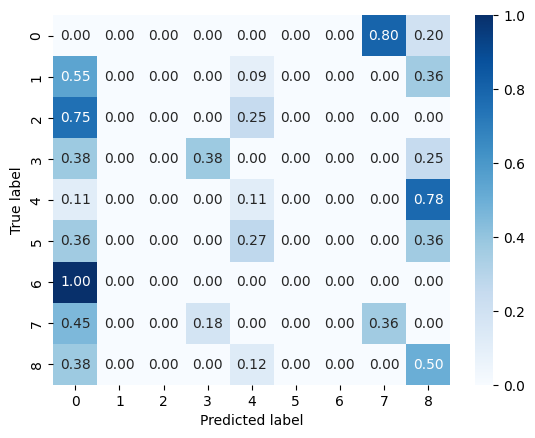

In [1118]:
report = plot_confusionMatrix(SVM_model_sigmoid, y_test_Both, X_test_Both)

### Classification Report

In [1119]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         8
           3       0.60      0.38      0.46         8
           4       0.12      0.11      0.12         9
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        12
           7       0.50      0.36      0.42        11
           8       0.18      0.50      0.27         8

    accuracy                           0.14        83
   macro avg       0.16      0.15      0.14        83
weighted avg       0.16      0.14      0.14        83



### Polynomial Kernel

### Evaluation without Cross Validation

In [1120]:
SVM_poly_test, SVM_poly_train, SVM_poly_prediction, SVM_model_Poly = SVM(X_train_Both, y_train_Both, X_test_Both, y_test_Both, 'poly')

print(f"Triaing Accuracy: {SVM_poly_train*100}\nTesting Accuracy: {SVM_poly_test*100}")

Triaing Accuracy: 30.513595166163142
Testing Accuracy: 14.457831325301203


### Evaluation with Cross Validation

In [1121]:
cv_accuracy = evaluate_cv_model(SVM_model_Poly, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

Cross Validation Accuracy: 20.050904977375563


### Confusion Matrix

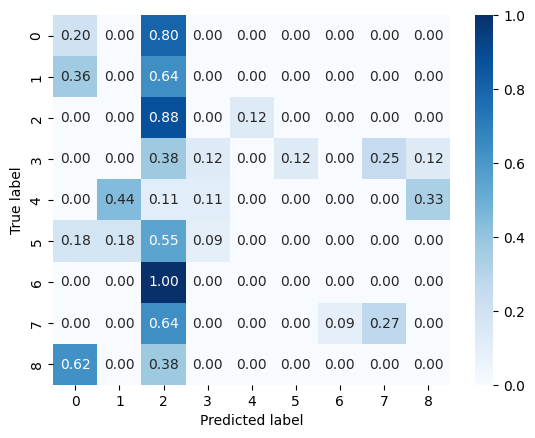

In [1122]:
report = plot_confusionMatrix(SVM_model_Poly, y_test_Both, X_test_Both)

### Classification Report

In [1123]:
print(report)

              precision    recall  f1-score   support

           0       0.08      0.20      0.12         5
           1       0.00      0.00      0.00        11
           2       0.14      0.88      0.24         8
           3       0.33      0.12      0.18         8
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        12
           7       0.60      0.27      0.37        11
           8       0.00      0.00      0.00         8

    accuracy                           0.14        83
   macro avg       0.13      0.16      0.10        83
weighted avg       0.13      0.14      0.10        83



# Logistic Regression model

## EEG Data

### Evaluation without Cross Validation

In [1124]:
LOG_REG_test, LOG_REG_train, LOG_REG_prediction, LOG_REG_model = Logistic_Regression(X_train_EEG, y_train_EEG, X_test_EEG, y_test_EEG)

print(f"Triaing Accuracy: {LOG_REG_train*100}\nTesting Accuracy: {LOG_REG_test*100}")

Triaing Accuracy: 25.981873111782477
Testing Accuracy: 19.27710843373494


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation with Cross Validation

In [1125]:
cv_accuracy = evaluate_cv_model(LOG_REG_model, X_EEG, y_EEG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Cross Validation Accuracy: 17.656485671191554


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

### Confusion Matrix

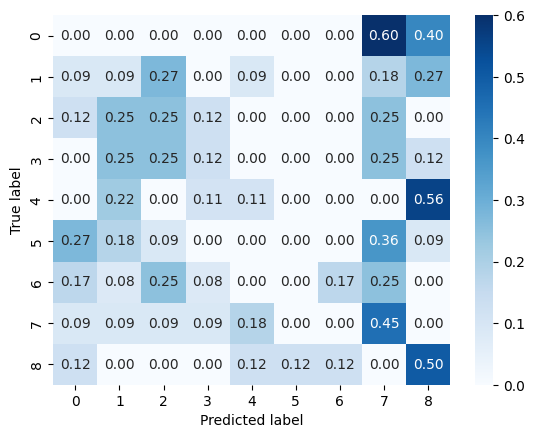

In [1126]:
report = plot_confusionMatrix(LOG_REG_model, y_test_EEG, X_test_EEG)

### Classification Report

In [1127]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.09      0.09      0.09        11
           2       0.17      0.25      0.20         8
           3       0.20      0.12      0.15         8
           4       0.20      0.11      0.14         9
           5       0.00      0.00      0.00        11
           6       0.67      0.17      0.27        12
           7       0.24      0.45      0.31        11
           8       0.25      0.50      0.33         8

    accuracy                           0.19        83
   macro avg       0.20      0.19      0.17        83
weighted avg       0.22      0.19      0.17        83



## ECG Data

### Evaluation without Cross Validation

In [1128]:
LOG_REG_test, LOG_REG_train, LOG_REG_prediction, LOG_REG_model = Logistic_Regression(X_train_ECG, y_train_ECG, X_test_ECG, y_test_ECG)

print(f"Triaing Accuracy: {LOG_REG_train*100}\nTesting Accuracy: {LOG_REG_test*100}")

Triaing Accuracy: 32.02416918429003
Testing Accuracy: 16.867469879518072


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation with Cross Validation

In [1129]:
cv_accuracy = evaluate_cv_model(LOG_REG_model, X_ECG, y_ECG, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Cross Validation Accuracy: 21.276395173454


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

### Confusion Matrix

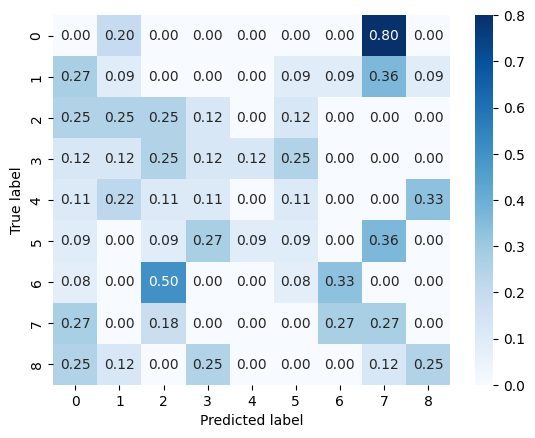

In [1130]:
report = plot_confusionMatrix(LOG_REG_model, y_test_ECG, X_test_ECG)

### Classification Report

In [1131]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.12      0.09      0.11        11
           2       0.14      0.25      0.18         8
           3       0.12      0.12      0.12         8
           4       0.00      0.00      0.00         9
           5       0.14      0.09      0.11        11
           6       0.50      0.33      0.40        12
           7       0.19      0.27      0.22        11
           8       0.33      0.25      0.29         8

    accuracy                           0.17        83
   macro avg       0.17      0.16      0.16        83
weighted avg       0.19      0.17      0.17        83



## ECG + EEG Data

### Evaluation without Cross Validation

In [1132]:
LOG_REG_test, LOG_REG_train, LOG_REG_prediction, LOG_REG_model = Logistic_Regression(X_train_Both, y_train_Both, X_test_Both, y_test_Both)

print(f"Triaing Accuracy: {LOG_REG_train*100}\nTesting Accuracy: {LOG_REG_test*100}")

Triaing Accuracy: 43.202416918429
Testing Accuracy: 26.506024096385545


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation with Cross Validation

In [1133]:
cv_accuracy = evaluate_cv_model(LOG_REG_model, X_Both, y_Both, kf)

print(f"Cross Validation Accuracy: {cv_accuracy*100}")

c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Cross Validation Accuracy: 23.449283559577676


c:\Partitiion\Pycharm_virtualenv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix

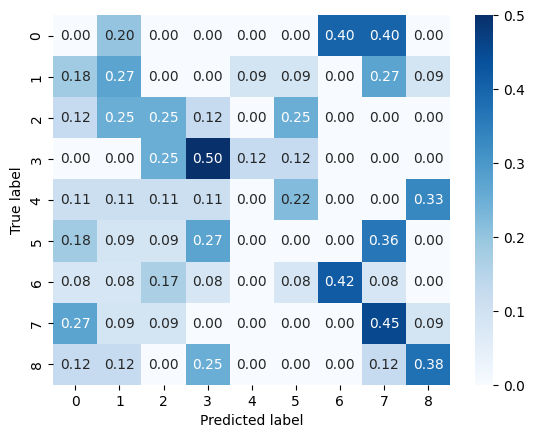

In [1134]:
report = plot_confusionMatrix(LOG_REG_model, y_test_Both, X_test_Both)

### Classification Report

In [1135]:
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.27      0.27      0.27        11
           2       0.22      0.25      0.24         8
           3       0.33      0.50      0.40         8
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        11
           6       0.71      0.42      0.53        12
           7       0.31      0.45      0.37        11
           8       0.38      0.38      0.38         8

    accuracy                           0.27        83
   macro avg       0.25      0.25      0.24        83
weighted avg       0.27      0.27      0.26        83

